# Content Based Recommender Systems 

In [1]:
!pip install sentence-transformers

     ---------------------------------------- 86.0/86.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 6.8/6.8 MB 7.5 MB/s eta 0:00:00
     -------------------------------------- 172.3/172.3 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 5.1 MB/s eta 0:00:00
     -------------------------------------- 199.8/199.8 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 4.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125960 sha256=7bac667d66a88a9d4b66edd406549373d94755dd6c4423469a1622660a0b44fc
  Stored in directory: c:\users\dipti\appdata\local\pip\cache\wheels\71\67\06\162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transfor


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 4.7 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\dipti\anaconda3\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

# Dataset. 

IMDb Top 1000 movie data

In this collection we have a list of movies with their correspondent features: 
- Poster_Link - Link of the poster that imdb using
- Series_Title = Name of the movie
- Released_Year - Year at which that movie released
- Certificate - Certificate earned by that movie
- Runtime - Total runtime of the movie
- Genre - Genre of the movie
- IMDB_Rating - Rating of the movie at IMDB site
- Overview - mini story/ summary
- Meta_score - Score earned by the movie
- Director - Name of the Director
- Star1,Star2,Star3,Star4 - Name of the Stars
- No_of_votes - Total number of votes
- Gross - Money earned by that movie

The features we are using are:

- An overview of the movie (i.e. a brief description)
- Its title
- Its genre (actually, each movie has multiple genres)


In [4]:
import pandas as pd
data = pd.read_csv(r'C:\Users\dipti\Downloads\imdb_top_1000.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# Approach
When working with textual data the first thing to do is to convert this text into vector representations. 

But how are we doing it? 
 - TFIDF
 - Word2Vec
 - BERT 

Well, this is a really good question and of course it is not really easy to find an optimal answer. Nonetheless, there are really good models (or more precisely transformers), like BERT, which are able to convert wisely sentences into texts. 


So here is what we will do:

Use BERT to convert our text into a vector
Get the cosine similarity (the cosine of the angle between the two vectors) of a fixed movie (vector) and all the other ones
Pick the movies (vectors) with the largest cosine similarity. We are going to pick 5 of them.


In [5]:
X = np.array(data.Overview)

In [6]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [7]:
embed_data = embeddings
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,2.986183,1.695378,4.334599,-2.351476,2.242131
1,-0.131720,0.888006,4.695477,-2.714034,-1.791216
2,-5.688413,-1.776829,-0.750676,-0.705396,4.125450
3,-1.211433,4.458768,1.582443,-3.537343,-2.345896
4,-0.971366,-2.374507,3.172298,3.071161,-0.177855


In [8]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  movies_recomm =  data['Series_Title'].loc[index_recomm].values
  result = {'Movies':movies_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The watched movie is this one: %s \n'%(data['Series_Title'].loc[index]))
    k=1
    for movie in movies_recomm:
      print('The number %i recommended movie is this one: %s \n'%(k,movie))
      k=k+1
  if print_recommendation_plots==True:
    print('The plot of the watched movie is this one:\n %s \n'%(data['Overview'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Overview'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the watched movie is this one:\n %s \n'%(data['Genre'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Genre'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

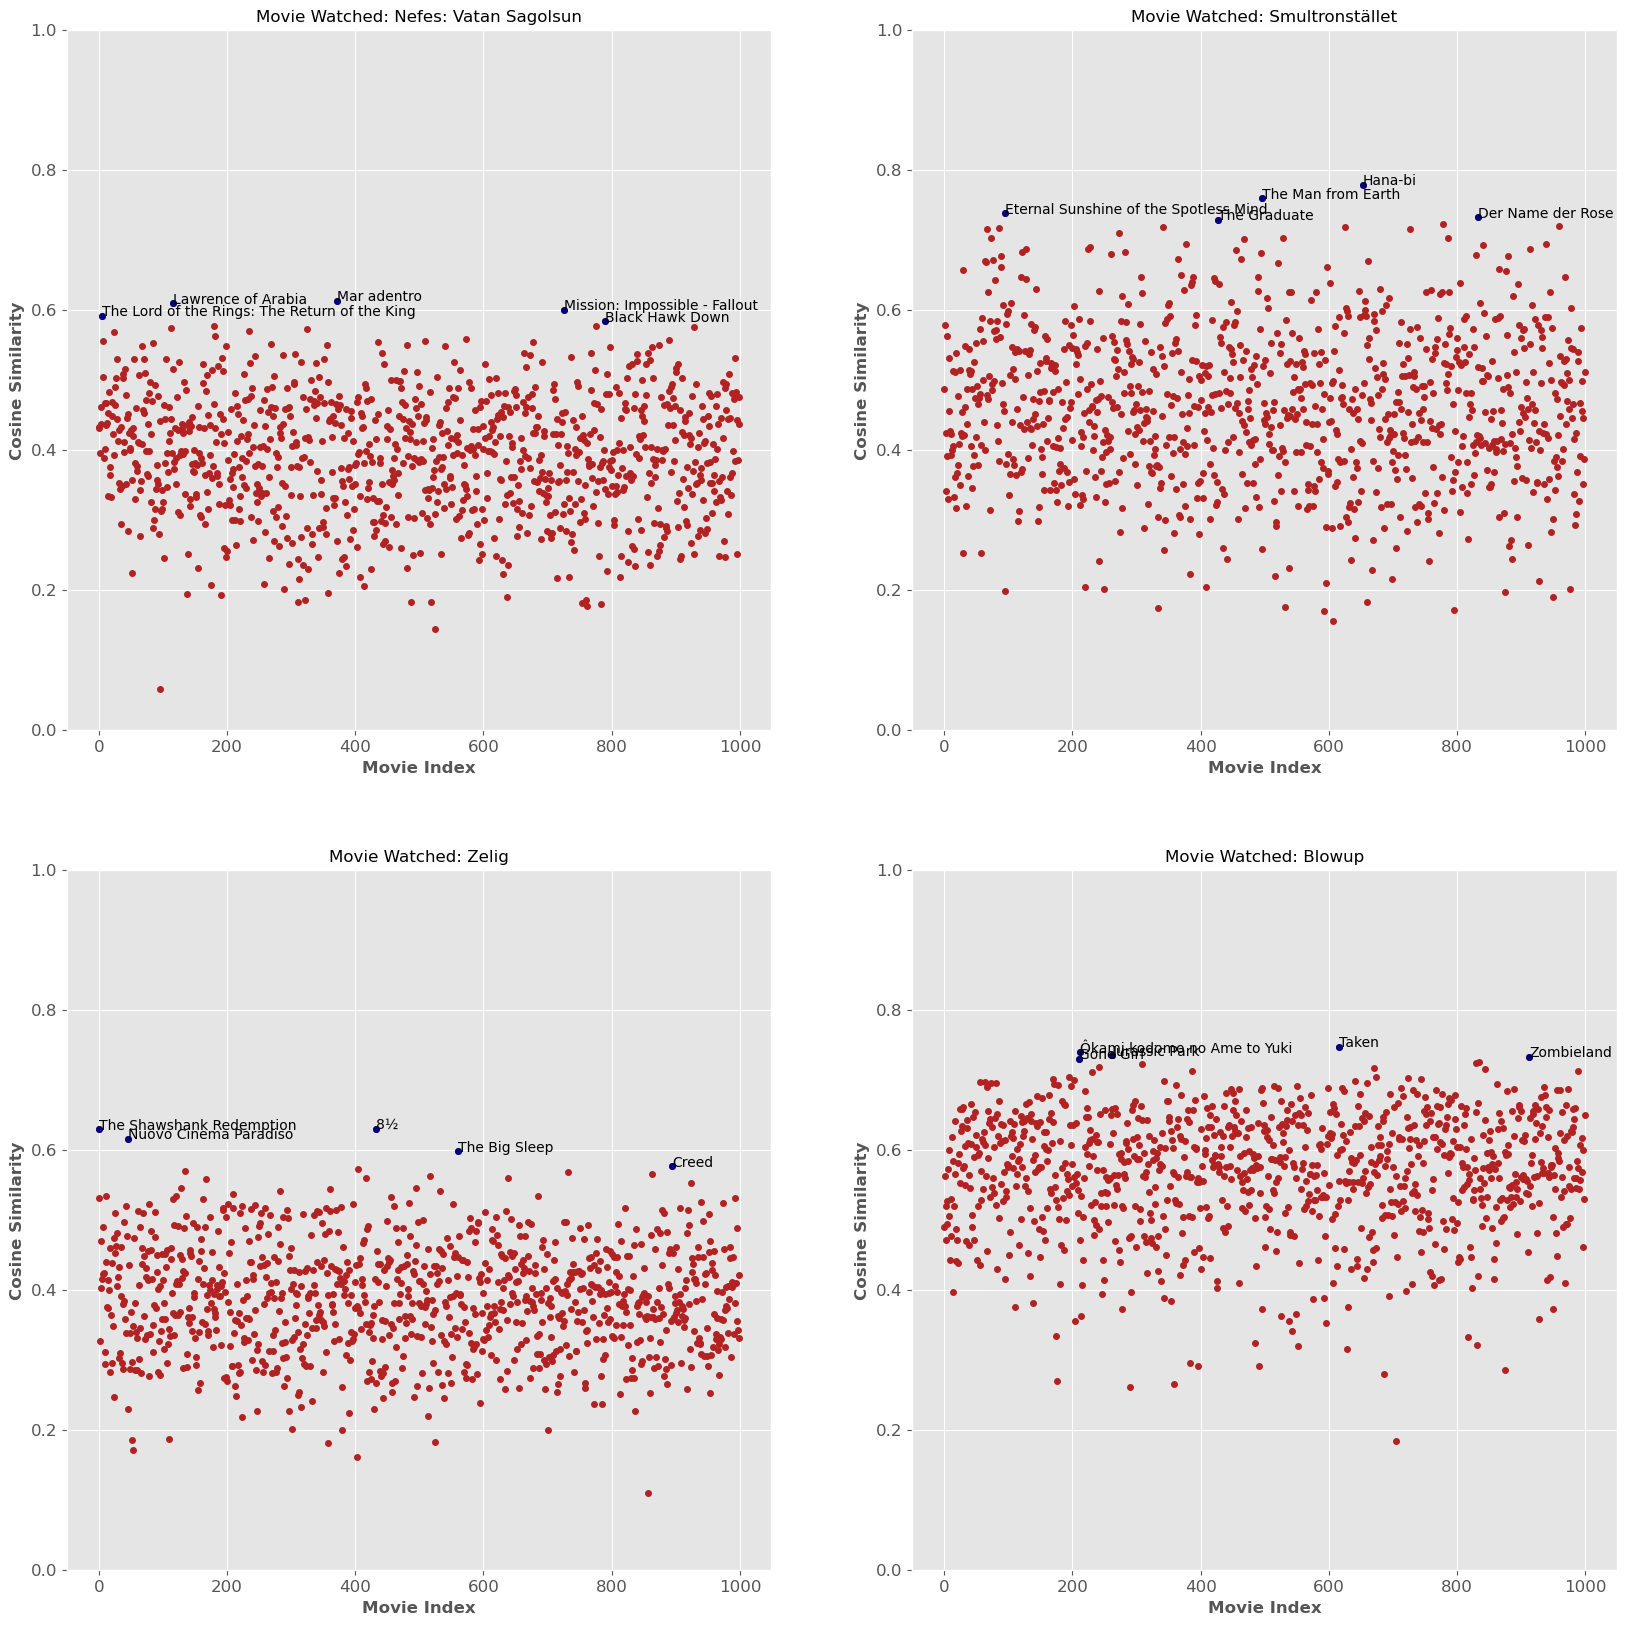

In [9]:
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Movies']
  plt.plot(x,y,'.',color='navy',label='Recommended Movies')
  plt.title('Movie Watched: '+data['Series_Title'].loc[index])
  plt.xlabel('Movie Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [10]:
give_recommendations(2,True)

The watched movie is this one: The Dark Knight 

The number 1 recommended movie is this one: Joker 

The number 2 recommended movie is this one: Dirty Harry 

The number 3 recommended movie is this one: Batman Begins 

The number 4 recommended movie is this one: Guardians of the Galaxy 

The number 5 recommended movie is this one: Death Note: Desu nôto 



{'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object),
 'Index': [33, 853, 155, 339, 762]}

In [11]:
give_recommendations(2,False,True)

The plot of the watched movie is this one:
 When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice. 

The plot of the number 1 recommended movie is this one:
 In Gotham City, mentally troubled comedian Arthur Fleck is disregarded and mistreated by society. He then embarks on a downward spiral of revolution and bloody crime. This path brings him face-to-face with his alter-ego: the Joker. 

The plot of the number 2 recommended movie is this one:
 When a madman calling himself "the Scorpio Killer" menaces the city, tough-as-nails San Francisco Police Inspector "Dirty" Harry Callahan is assigned to track down and ferret out the crazed psychopath. 

The plot of the number 3 recommended movie is this one:
 After training with his mentor, Batman begins his fight to free crime-ridden Gotham City from corruption. 

The plot of the number 4 recommended movie is t

{'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object),
 'Index': [33, 853, 155, 339, 762]}

In [12]:
give_recommendations(10,True,True)

The watched movie is this one: The Lord of the Rings: The Fellowship of the Ring 

The number 1 recommended movie is this one: The Lord of the Rings: The Return of the King 

The number 2 recommended movie is this one: Harry Potter and the Deathly Hallows: Part 2 

The number 3 recommended movie is this one: The Hobbit: An Unexpected Journey 

The number 4 recommended movie is this one: Star Wars: Episode VII - The Force Awakens 

The number 5 recommended movie is this one: The Hobbit: The Desolation of Smaug 

The plot of the watched movie is this one:
 A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron. 

The plot of the number 1 recommended movie is this one:
 Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring. 

The plot of the number 2 recommended movie is this one:
 Harry, Ron, and Hermi

{'Movies': array(['The Lord of the Rings: The Return of the King',
        'Harry Potter and the Deathly Hallows: Part 2',
        'The Hobbit: An Unexpected Journey',
        'Star Wars: Episode VII - The Force Awakens',
        'The Hobbit: The Desolation of Smaug'], dtype=object),
 'Index': [5, 226, 618, 477, 609]}

In [13]:
give_recommendations(60,True,True,True)

The watched movie is this one: Avengers: Infinity War 

The number 1 recommended movie is this one: Thor: Ragnarok 

The number 2 recommended movie is this one: Guardians of the Galaxy 

The number 3 recommended movie is this one: X-Men: Days of Future Past 

The number 4 recommended movie is this one: Avengers: Endgame 

The number 5 recommended movie is this one: The Avengers 

The plot of the watched movie is this one:
 The Avengers and their allies must be willing to sacrifice all in an attempt to defeat the powerful Thanos before his blitz of devastation and ruin puts an end to the universe. 

The plot of the number 1 recommended movie is this one:
 Imprisoned on the planet Sakaar, Thor must race against time to return to Asgard and stop Ragnarök, the destruction of his world, at the hands of the powerful and ruthless villain Hela. 

The plot of the number 2 recommended movie is this one:
 A group of intergalactic criminals must pull together to stop a fanatical warrior with plans

{'Movies': array(['Thor: Ragnarok', 'Guardians of the Galaxy',
        'X-Men: Days of Future Past', 'Avengers: Endgame', 'The Avengers'],
       dtype=object),
 'Index': [473, 339, 479, 59, 357]}

In [14]:
recomm_list = []
for i in range(len(X)):
  recomm_i = give_recommendations(i)
  recomm_list.append(recomm_i['Movies'])
recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation'])
recomm_data['Watched Movie'] = data['Series_Title']
recomm_data = recomm_data[['Watched Movie','First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation']]

In [15]:
recomm_data.sample(frac=1).head()

,Watched Movie,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
716,Bride of Frankenstein,Kumonosu-jô,La piel que habito,Inherit the Wind,Frankenstein,Raiders of the Lost Ark
562,The Philadelphia Story,Crimes and Misdemeanors,Philomena,Match Point,Le passé,Shadow of a Doubt
61,Coco,Young Frankenstein,The Blues Brothers,Shine,Control,Hell or High Water
105,Idi i smotri,Ivanovo detstvo,The Dirty Dozen,All Quiet on the Western Front,Apocalypse Now,La Grande Illusion
364,Sin City,L.A. Confidential,Amores perros,No Man's Land,Office Space,Tropa de Elite 2: O Inimigo Agora é Outro
